In [1]:
import cv2
from matplotlib import pyplot as plt

In [3]:
#1
src = cv2.imread('./data/people_test.png')
hog = cv2.HOGDescriptor() 
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
#사람을 검출할 수 있는 Detector

len(loc1)= 2


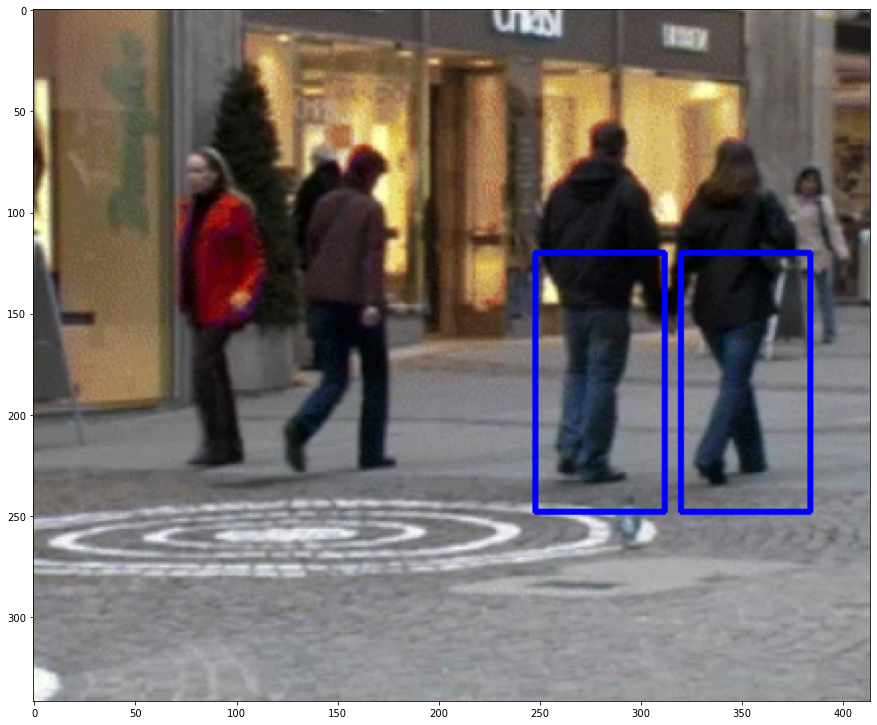

In [9]:
#2
loc1, weights1 = hog.detect(src) # object의 위치, 실제 object의 확률
print('len(loc1)=',len(loc1))
dst1 = src.copy()
w, h = hog.winSize
#실제 사이즈랑 맞지 않아 네모 박스가 이상하게 나옴
for pt in loc1:
    x, y = pt
    cv2.rectangle(dst1, (x, y), (x+w, y+h), (255,0,0),2)
    
dst1_rgb = cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst1_rgb)
plt.show()

len(loc2)= 4
[[2.12034904]
 [2.59137908]
 [1.2188268 ]
 [2.86983766]]


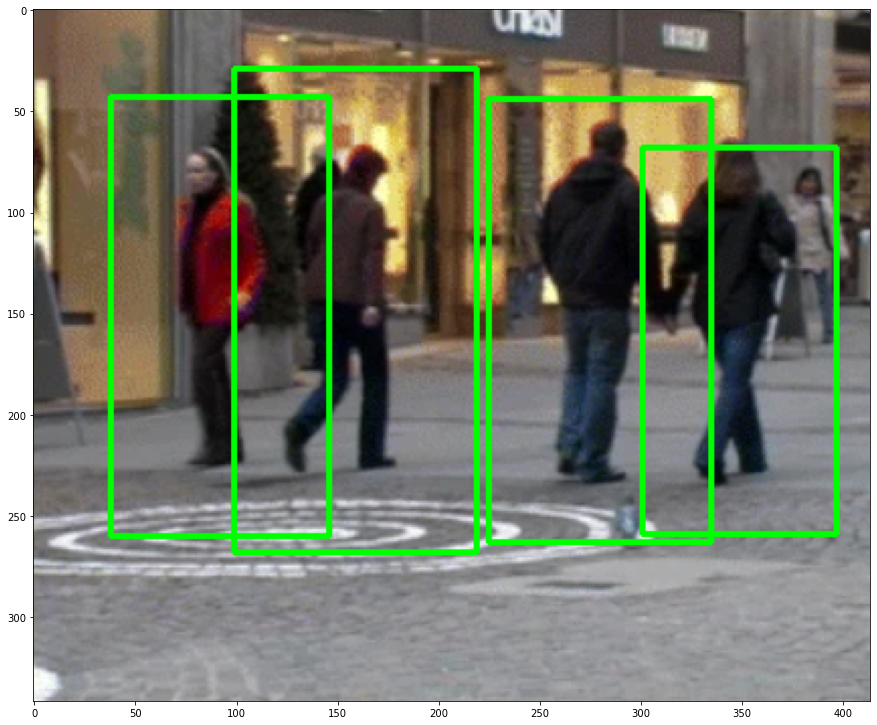

In [10]:
#3
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src)
print('len(loc2)=',len(loc2))
print(weights2)
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0,255,0),2)

dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst2_rgb)
plt.show()

#구석에 있는 여성은 찾지 못함.

len(loc3)= 5
weights3= [[3.88430392]
 [2.4595084 ]
 [3.77631898]
 [1.56293269]
 [1.73125663]]


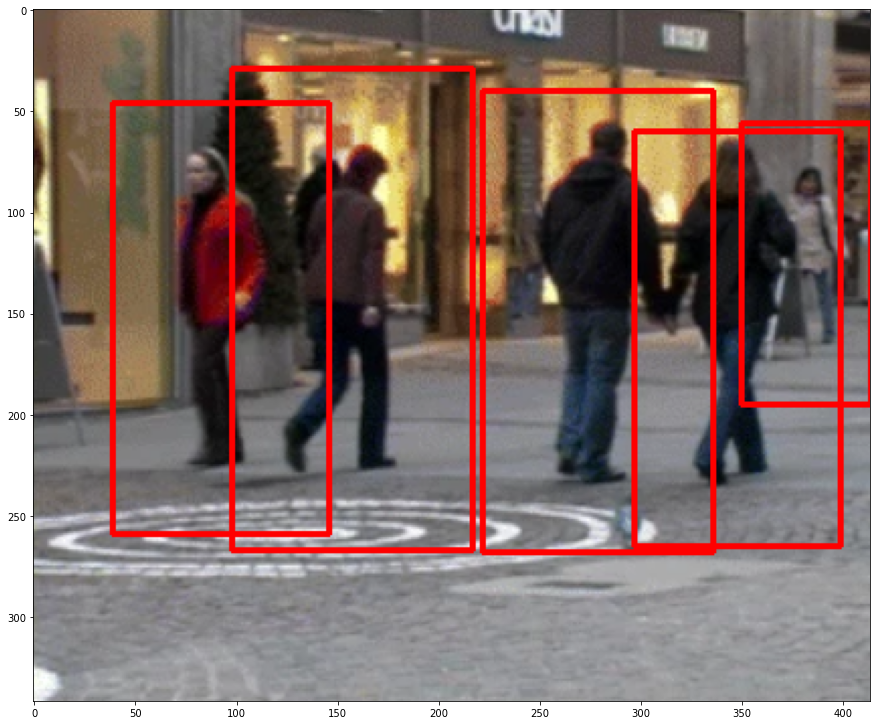

In [11]:
#4
dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1, 1), padding =(8, 8))
print('len(loc3)=',len(loc3))
print('weights3=', weights3)
for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i]>0.5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,0,255),2)
    else:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (255,0,0),2)
    
dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,30))
plt.imshow(dst3_rgb)
plt.show()